In [ ]:
# Setup
!pip install yolo34py-gpu
!git clone https://github.com/madhawav/YOLO3-4-Py.git
!sh YOLO3-4-Py/download_models.sh

     |████████████████████████████████| 71kB 9.4MB/s 
  Created wheel for yolo34py-gpu: filename=yolo34py_gpu-0.1rc12-cp36-cp36m-linux_x86_64.whl size=801112 sha256=46848580d8af5e55482c92ae0b13676f99e94500e7826303af1cb1a8e0358994
  Stored in directory: /root/.cache/pip/wheels/5e/f9/4e/6b7d50e747b9b57a00d53fc866ed67e467d36f205a4632e3f2
Successfully built yolo34py-gpu
Cloning into 'YOLO3-4-Py'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 295 (delta 12), reused 1 (delta 0), pack-reused 265
Receiving objects: 100% (295/295), 6.02 MiB | 33.87 MiB/s, done.
Resolving deltas: 100% (164/164), done.
--2020-12-03 18:51:18--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/coco.data
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133

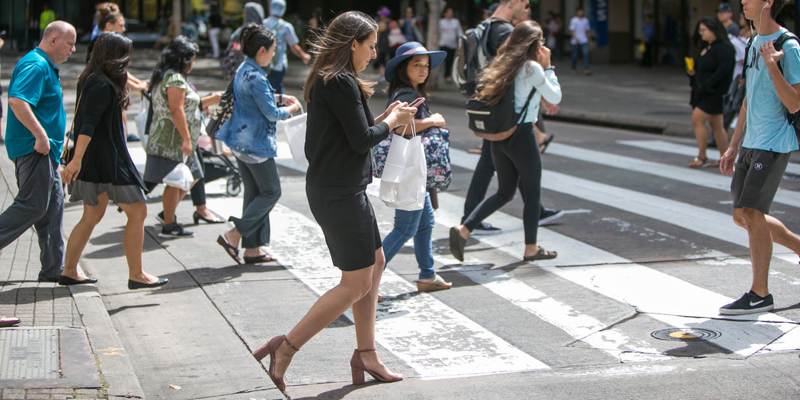

In [63]:
import cv2
img = cv2.imread('/content/input_image.jpg')
#img = cv2.resize(img, None, fx=0.25, fy=0.25)
import PIL
pil_image = PIL.Image.fromarray(img[:,:,::-1])
pil_image.resize((800,400))

In [49]:
from pydarknet import Detector, Image
net = Detector(bytes("./cfg/yolov3.cfg", encoding="utf-8"), bytes("./weights/yolov3.weights", encoding="utf-8"),
               0, bytes("./cfg/coco.data",encoding="utf-8"))

In [61]:
img_darknet = Image(img)
results = net.detect(img_darknet)

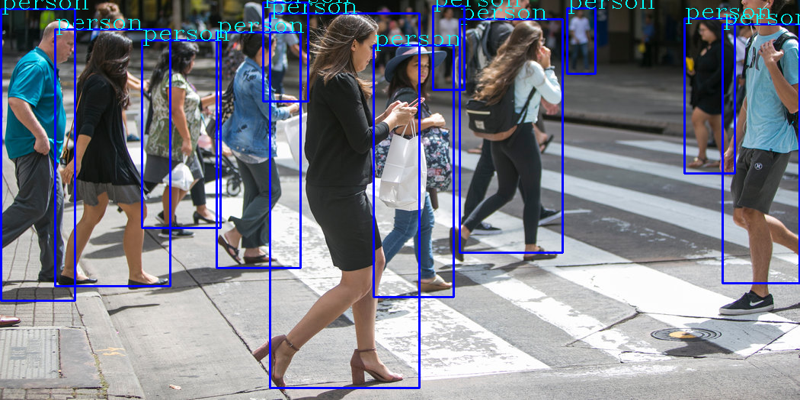

In [62]:
img_output = img.copy()
for cat, score, bounds in results:
  if cat.decode('utf-8') == 'person':
    x, y, w, h = bounds
    cv2.rectangle(img_output, (int(x - w / 2), int(y - h / 2)), (int(x + w / 2), int(y + h / 2)), (255, 0, 0), thickness=2)
    cv2.putText(img_output,str(cat.decode("utf-8")),(int(x-w/2),int(y-h/2)),cv2.FONT_HERSHEY_COMPLEX,1,(255,255,0))
    #print('cat decode', cat.decode('utf-8'))
pil_image_output = PIL.Image.fromarray(img_output[:,:,::-1])
pil_image_output.resize((800,400))